# Resolução de EDO via operadores lineares #

Objetivo: Resolver o seguinte problema de valor inicial:

$$\frac{d^{2}y}{{dt}^{2}} + 5\frac{dy}{dt} + 6y = 0$$
$$y(0) = 0\hspace{0.1cm},\hspace{0.1cm}y(2) = 0.2$$

Utilizando operadores lineares e comparar a solução obtida com a solução via métodos iterativos e também com a solução real:

$$y\approx 12.63e^{-2t} - 12.63e^{-3t}$$

## Gráfico da solução analítica: ##

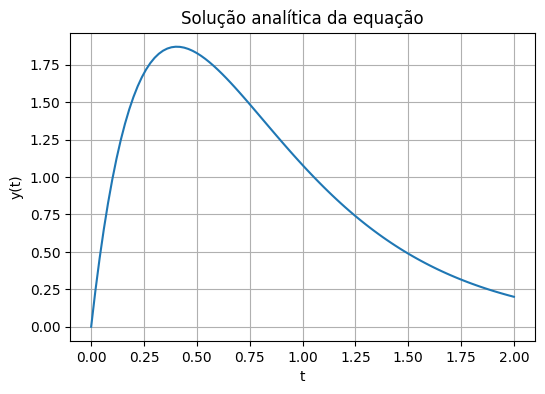

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def y_real(t):
    exp1 = np.exp(-2*t)
    exp2 = np.exp(-3*t)
    return 12.63 * exp1 - 12.63 * exp2

T = np.linspace(0, 2, 101)
Y = y_real(T)

plt.figure(figsize=(6, 4)) 
plt.plot(T, Y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.title('Solução analítica da equação')
plt.show()

## Solução via métodos iterativos ##

Utilizando o método das diferenças centrais, encontramos para essa equação:

$$y_{i}\left(6-\frac{2}{\Delta^{2}}\right)\approx y_{i-1}\left(\frac{5}{2\Delta}-\frac{1}{\Delta^{2}}\right) - y_{i+1}\left(\frac{1}{\Delta^{2}}+\frac{5}{2\Delta}\right)$$

Implementando-a:

Número de pontos: N = 51
Passo: ∆ = 0.04 


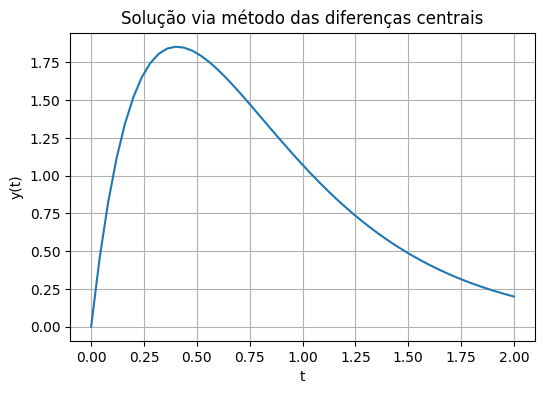

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 0
tN = 2
N = int(input('Informe o número de pontos: '))
Delta = (tN-t0)/(N-1)

Y = np.zeros(N) #Criando o vetor de soluções
Y[-1] = 0.2 # Definindo as condições de fronteira

A = 1/(Delta**2) + 5/(2*Delta)
B = 5/(2*Delta) - 1/(Delta**2)
C = 6 - 2/(Delta**2)

erro_at = 1000
erro_p = 1e-4

while(erro_at > erro_p): #Aplicando o método de Gauss-Seidel
    Y_antigo = Y.copy() #Mantendo salvos os valores antigos de Y
    for i in range(1,N-1,1): #Atualizando os valores de Y
        Y[i] = (Y[i-1] * B - Y[i+1]*A)/C
    erro_at = np.max(np.abs(Y-Y_antigo))

T = np.linspace(t0, tN, N)
plt.figure(figsize=(6, 4)) 
plt.plot(T, Y)
plt.grid(True)
plt.title('Solução via método das diferenças centrais')
plt.xlabel('t')
plt.ylabel('y(t)')
print(f'Número de pontos: N = {N}\nPasso: \u2206 = {Delta} ')
plt.show()

## Solução via operadores lineares ##

A seguir, segue a solução utilizando operadores lineares para essa equação:

Número de pontos: N = 41
Passo: ∆ = 0.05 


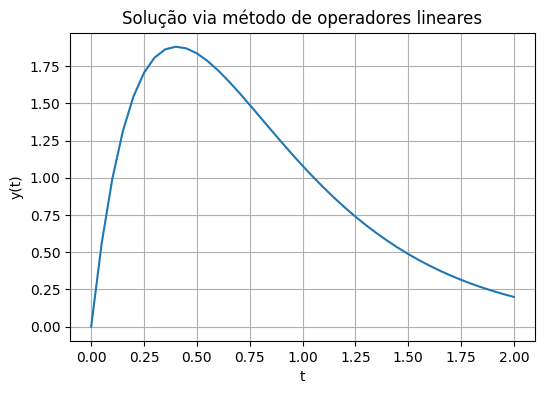

In [5]:
import numpy as np
import scipy.linalg as lin
import matplotlib.pyplot as plt

t0 = 0
tN = 2

N = int(input('Informe o número de pontos: '))
Delta = (tN - t0)/ (N-1)

def Dx(N):
    D = np.zeros((N,N))
    D[0,1] = 1
    D[-1,-2] = -1
    for i in range(1,N-1):
        D[i,i-1] = -1
        D[i,i+1] = 1
    return D/ (2 * Delta)

def Dx2(N):
    D = np.zeros((N,N))
    D[0,0] = -2; D[0,1] = 1
    D[-1,-1] = -2; D[-1,-2] = 1
    for i in range(1,N-1):
        D[i,i] = -2
        D[i,i-1] = 1
        D[i,i+1] = 1
    return D/(Delta**2)
# Definindo o operador linear: 

L = Dx2(N) + 5*Dx(N) + 6*np.identity(N)

# Definindo as condições iniciais: 

y0 = 0
yN = 0.2

#Ajustando a primeira e ultima coluna do operador:

L[0,:] = 0; L[0,0] = 1
L[-1,:] = 0; L[-1,-1] = 1

#Ajustando os valores g:

g = np.zeros(N)
g[0] = 0; g[-1] = 0.2

#Calculando os valores intermediários:

Y = np.dot(np.linalg.inv(L),g)

T = np.linspace(t0, tN, N)
plt.figure(figsize=(6, 4)) 
plt.plot(T, Y)
plt.grid(True)
plt.title('Solução via método de operadores lineares')
plt.xlabel('t')
plt.ylabel('y(t)')
print(f'Número de pontos: N = {N}\nPasso: \u2206 = {Delta} ')
plt.show()